In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
!pip install torchmetrics
from torchmetrics import Accuracy, Precision, F1Score
from pathlib import Path
from torch import optim
import torch.nn as nn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 9.7 MB/s eta 0:00:00


In [5]:
dir_path= '/content/drive/MyDrive/Data Mining/YogaData'

In [3]:
##Transform Data for Trust Sake
from torchvision import transforms
transformer = torchvision.transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor(),
])

In [6]:
##Load Image to Dataset 
datafolder = torchvision.datasets.ImageFolder(dir_path, transform = transformer)

In [7]:
#Split Dataset
import torch.utils.data as data

# Random split
train_set_size = int(len(datafolder) * 0.8)
valid_set_size = len(datafolder) - train_set_size
train_set, valid_set = data.random_split(datafolder, [train_set_size, valid_set_size])

In [8]:
#length of data
len(train_set), len(valid_set)

(2204, 552)

In [9]:
classes = datafolder.classes
classes_len = len(classes)
classes_len, classes


(47,
 ['Adho Mukha Svanasana',
  'Adho Mukha Vrksasana',
  'Alanasana',
  'Anjaneyasana',
  'Ardha Chandrasana',
  'Ardha Matsyendrasana',
  'Ardha Navasana',
  'Ardha Pincha Mayurasana',
  'Ashta Chandrasana',
  'Baddha Konasana',
  'Bakasana',
  'Balasana',
  'Bitilasana',
  'Camatkarasana',
  'Dhanurasana',
  'Eka Pada Rajakapotasana',
  'Garudasana',
  'Halasana',
  'Hanumanasana',
  'Malasana',
  'Marjaryasana',
  'Navasana',
  'Padmasana',
  'Parsva Virabhadrasana',
  'Parsvottanasana',
  'Paschimottanasana',
  'Phalakasana',
  'Pincha Mayurasana',
  'Salamba Bhujangasana',
  'Salamba Sarvangasana',
  'Setu Bandha Sarvangasana',
  'Sivasana',
  'Supta Kapotasana',
  'Trikonasana',
  'Upavistha Konasana',
  'Urdhva Dhanurasana',
  'Urdhva Mukha Svsnssana',
  'Ustrasana',
  'Utkatasana',
  'Uttanasana',
  'Utthita Hasta Padangusthasana',
  'Utthita Parsvakonasana',
  'Vasisthasana',
  'Virabhadrasana One',
  'Virabhadrasana Three',
  'Virabhadrasana Two',
  'Vrksasana'])

In [10]:
# Load a Sample
img, label = train_set[0]

In [11]:
# Sample Details
img.shape, label

(torch.Size([3, 224, 224]), 27)

torch.Size([3, 224, 224])


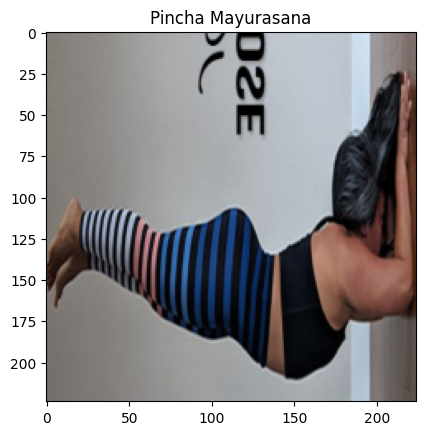

In [12]:
#View Sample Image
import matplotlib.pyplot as plt
img_sample = img.permute(2, 1, 0)
print(img.shape)
plt.imshow(img_sample)
plt.title(classes[label]);

**Get Model**

In [13]:
import torchvision
from torchvision import models
import torchvision.models.efficientnet as e
import torchvision.models.resnet as r

In [14]:
#Load Weights for Training
WEIGHTS = r.resnet50(pretrained= True)
WEIGHTS2 = e.efficientnet_b0(pretrained= True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 206MB/s]
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in t

In [15]:
#View Resnet Details
WEIGHTS.state_dict

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

In [16]:
##Freeze Model Params for Transfer Learning
for p in WEIGHTS.parameters():
    p.requires_grad = False

In [17]:
WEIGHTS.fc = nn.Linear(2048, classes_len)

In [18]:
#View Output Predictor
WEIGHTS.fc

Linear(in_features=2048, out_features=47, bias=True)

In [20]:
#Set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [21]:
model = WEIGHTS
#Take model to device
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#### Implement DataLoader

In [24]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(dataset =train_set, batch_size =BATCH_SIZE, shuffle = True)
test_loader = DataLoader(dataset= valid_set, batch_size = BATCH_SIZE)

### Evaluation Metrics/ Loss Function / Optimizers


In [35]:
# Set up parameters
num_classes=100
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.01)
accuracy_fn = Accuracy(num_classes=num_classes, compute_on_step=False, dist_sync_on_step=False, task="multiclass").to(device)
f1 = F1Score(num_classes=num_classes, compute_on_step=False, dist_sync_on_step=False, task="multiclass").to(device)



### Training and Evaluation

In [36]:
EPOCHS = 10

train_losses, train_acc = 0, 0

for epoch in range(EPOCHS):
  for batch, (X, y )in enumerate(train_loader):
    X = X.to(device)
    y = y.to(device)
    model.train()

    y_pred =model(X)
    loss = loss_fn(y_pred, y)
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
    train_losses += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if batch % 100 == 0:
      print(f'{train_losses} | {train_acc}')

  train_losses /= len(train_loader)
  train_acc /= len(train_loader)
  print(f' Train Loss: {train_losses:.4f} | Train Acc: {train_acc:.3f}')

model.eval()
test_loss, test_acc, test_f1 = 0, 0, 0
with torch.inference_mode():
    for Xt, yt in test_loader:
        Xt = Xt.to(device)
        yt= yt.to(device)
        test_pred = model(X)
        t_loss = loss_fn(test_pred, y)
        test_loss += t_loss
        test_acc += accuracy_fn(test_pred.argmax(dim=1), y)
        test_f1 += f1(test_pred.argmax(dim=1), y)
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    test_f1 /= len(test_loader)
    
    print(f' Test Loss {test_loss:.4f} | Test Acc: {test_acc:.2f} | F1Score: {test_f1}  ')

12.140734672546387 | 0.0625


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 Train Loss: 8.1157 | Train Acc: 0.210
10.107379913330078 | 0.6783126592636108
 Train Loss: 2.1356 | Train Acc: 0.525
3.2231452465057373 | 1.24326753616333
 Train Loss: 1.5818 | Train Acc: 0.641
2.7504806518554688 | 1.2971980571746826
 Train Loss: 1.0395 | Train Acc: 0.750
2.5581367015838623 | 1.4061577320098877
 Train Loss: 1.0365 | Train Acc: 0.734
1.5629560947418213 | 1.5467766523361206
 Train Loss: 0.7318 | Train Acc: 0.801
1.0933208465576172 | 1.7071995735168457
 Train Loss: 0.7661 | Train Acc: 0.815
1.8786373138427734 | 1.5958471298217773
 Train Loss: 0.6434 | Train Acc: 0.848
1.052736759185791 | 1.7225977182388306
 Train Loss: 0.7430 | Train Acc: 0.834
1.0158565044403076 | 1.7719242572784424
 Train Loss: 0.6973 | Train Acc: 0.846
 Test Loss 0.4069 | Test Acc: 0.93 | F1Score: 0.9285714626312256  


In [37]:
!wget 'https://images.everydayhealth.com/images/healthy-living/fitness/yoga-poses-for-beginners-03-722x406.jpg'

--2023-04-18 01:42:46--  https://images.everydayhealth.com/images/healthy-living/fitness/yoga-poses-for-beginners-03-722x406.jpg
Resolving images.everydayhealth.com (images.everydayhealth.com)... 23.59.177.198, 23.59.177.206
Connecting to images.everydayhealth.com (images.everydayhealth.com)|23.59.177.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28867 (28K) [image/jpeg]
Saving to: ‘yoga-poses-for-beginners-03-722x406.jpg’

yoga-poses-for-begi 100%[===================>]  28.19K  --.-KB/s    in 0.01s   

2023-04-18 01:42:46 (2.84 MB/s) - ‘yoga-poses-for-beginners-03-722x406.jpg’ saved [28867/28867]



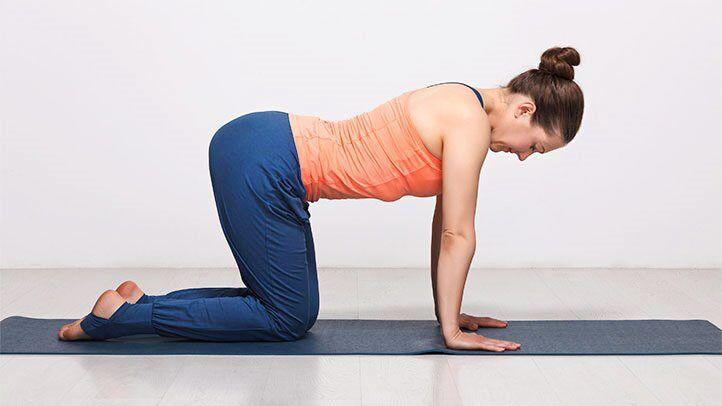

In [38]:
load_path = './yoga-poses-for-beginners-03-722x406.jpg'
from PIL import Image
img = Image.open(load_path)
img

In [39]:
transformed_img = transformer(img)

In [40]:
transformed_img = transformed_img.unsqueeze(dim=0)
transformed_img.shape

torch.Size([1, 3, 224, 224])

In [41]:
transformed_img.to(device)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [42]:
transformed_img = transformed_img.to(device)

In [43]:
transformed_img.device

device(type='cpu')

In [44]:
with torch.inference_mode():
    transformed_img.to(device)
    output = model(transformed_img)

In [45]:
outputp = torch.argmax(output).detach()
outputp =outputp.item()

In [46]:
Predicted_class = classes[outputp]
print(f'Predicted Class is: {Predicted_class} ')

Predicted Class is: Bitilasana 


In [47]:
from googlesearch import search

def search_youtube_video_link(keyword):
    # Set the search query
    query = f"{keyword} youtube"

    # Set the language and country code (you can modify them based on your preferences)
    lang = 'en'
    country_code = 'US'

    # Search for the query on Google
    search_results = search(query, lang=lang, country=country_code)

    # Loop through the search results and find the first YouTube video link
    for result in search_results:
        if 'youtube.com/watch' in result:
            return result

In [48]:
video_link = search_youtube_video_link(Predicted_class)
print(video_link)

https://www.youtube.com/watch?v=W5KVx0ZbB_4


In [50]:
# Save the PyTorch model

torch.save(model, 'model.pth')



In [54]:
import pickle

# Save the PyTorch model using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
